In [9]:
import pandas as pd;
import numpy as np;


In [10]:
r = pd.read_csv('train.csv')

/Users/joseph/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
a = r.drop(['ID'],axis=1)

In [12]:
len(a)

145231

In [13]:
z = a.dropna(how='any',axis=1)

In [14]:
z

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0532,VAR_0533,VAR_0534,VAR_0535,VAR_0536,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,H,224,0,4300,C,5,0,0,5,3,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,H,7,53,4448,B,0,0,0,3,12,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,H,116,3,3464,C,0,0,0,1,2,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,H,240,300,3200,C,0,0,0,1,6,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,R,72,261,2000,N,0,0,0,1,8,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1
5,R,4,4,4422,C,0,0,0,1,3,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
6,H,60,132,40000,C,2,1,0,5,1,...,0,1,0,999999996,400,400,9996,76,IAPS,1
7,R,13,75,3600,B,0,0,0,0,1,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
8,R,17,16,2296,N,0,0,0,1,5,...,0,97,997,999999997,400,997,9996,90,MOBILE,1
9,R,24,72,450,N,0,0,0,0,1,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0


In [15]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(z, test_size=0.1)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

isCategorical = [(type(train[z][1])!=np.float64 and type(train[z][1])!=np.int64) for z in train.columns]


In [16]:
isCategorical

[True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [17]:
listOfCategoricals = np.where(isCategorical)[0].tolist()

processed_train = pd.DataFrame();
processed_test = pd.DataFrame();



In [18]:
categoricalVars = train[listOfCategoricals].columns
for c in categoricalVars:
    try:
        train[c] = le.fit_transform(train[c])
        test[c] = le.fit_transform(test[c])
    except:
        pass;


    
# train_copy = train.copy(deep=True)
# test_copy = test.copy(deep=True)
# for c in categoricalVars:
#     try:
#         train_copy[c] = processed_train[c]
#         test_copy[c] = processed_test[c]
#     except:
#         train_copy.drop([c],axis=1)
#         test_copy.drop([c],axis=1)

# train_copy

/Users/joseph/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/joseph/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
# for i in train_copy.columns:
#     if(type(train_copy[i][14])==str):
#         train_copy = train_copy.drop([i],axis=1)

# for i in test_copy.columns:
#     if(type(test_copy[i][11410])==str):
#         test_copy = test_copy.drop([i],axis=1)

trainY = train.target
trainX = train.drop(['target'],axis=1)

testY = test.target;
testX = test.drop(['target'],axis=1);

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(trainX, trainY)

In [21]:
randomForestOutput = clf.predict(testX)
randomForestResults = [testY.values[c]==randomForestOutput[c] for c in range(len(testX))]
print("RandomForest results:");
print(randomForestResults.count(True)/len(randomForestResults));

RandomForest results:
0.7890388322776095


In [22]:
probabilities = clf.predict_proba(testX)
probabilities_indexes = [np.argmax(x) for x in probabilities]
# probabilities

In [23]:
import numpy as np
from sklearn.metrics import roc_auc_score

# roc_auc_score(testY, randomForestOutput)
roc_auc_score(testY, probabilities_indexes)

0.58228295324469492

In [24]:
clf.score(testX, testY, sample_weight=None)

0.78903883227760951

In [25]:
clf2 = RandomForestClassifier(n_estimators=15, verbose=1)
clf2 = clf2.fit(trainX, trainY)

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   32.4s finished


In [26]:
names = train.columns
feature_importances = dict(zip( names, map(lambda x: round(x, 4), clf2.feature_importances_)))

In [27]:
import operator;
sorted_features = sorted(feature_importances.items(), key=operator.itemgetter(1),reverse=True)

In [28]:
# sorted_features.keys().index('VAR_0813')
# sorted_features.index(('VAR_0813', 0.001))
# we want top 330 features


In [29]:
# sorted_features[330][0]
top_330_features = []
for n in sorted_features[:330]:
    top_330_features.append(n[0])
top_330_features.append('target')

In [30]:
bottom_1078_features = z.columns.difference(top_330_features)

In [31]:
# z_top_330 = z.drop(bottom_1078_features,axis=1);
z_top_330 = pd.DataFrame(z,columns=top_330_features)

In [32]:
z_top_330

,VAR_1128,VAR_0795,VAR_1329,VAR_1136,VAR_1124,VAR_1934,VAR_0853,VAR_1330,VAR_0886,VAR_1126,...,VAR_1518,VAR_1141,VAR_1426,VAR_1513,VAR_1353,VAR_1314,VAR_1241,VAR_1894,VAR_1204,target
0,100,0,82,9996,0,IAPS,-99999,82,89,0,...,997,9996,9998,997,49463,49463,76857,999999997,999999997,0
1,100,1,101,9996,0,IAPS,1,101,95,0,...,100,9996,9998,14,2612,1621,2612,2788,519,0
2,100,0,997,24,0,IAPS,26,997,82,0,...,27,9996,9998,13,999999997,999999997,999999997,999999997,616,0
3,56,0,95,0,11,RCC,3,95,72,9,...,38,71,54,12,286,286,286,999999996,429,0
4,92,0,99,6,6,BRANCH,6,97,81,6,...,33,9996,9998,6,9836,4272,9836,2837,345,1
5,56,0,108,3,46,IAPS,5,91,78,46,...,80,55,9998,25,1237,912,1237,999999998,439,0
6,13,7,48,0,24,IAPS,0,48,65,24,...,0,14,9998,4,143,143,143,999999997,394,1
7,11,3,996,1,65,IAPS,0,996,47,35,...,13,30,29,15,999999996,999999996,999999996,150,999999996,0
8,83,5,112,0,17,MOBILE,0,112,68,13,...,46,29,54,23,336,336,336,308,457,1
9,20,0,76,4,60,BRANCH,10,76,89,60,...,0,9996,9998,996,382,382,382,0,999999998,0


In [33]:
isCategorical = [(type(z_top_330[z][1])!=np.float64 and type(z_top_330[z][1])!=np.int64) for z in z_top_330.columns]
listOfCategoricals = np.where(isCategorical)[0].tolist()

categoricalVars = z_top_330[listOfCategoricals].columns
for c in categoricalVars:
    try:
        z_top_330[c] = le.fit_transform(z_top_330[c])
        z_top_330[c] = le.fit_transform(z_top_330[c])
    except:
        pass;

In [34]:
from sklearn.cross_validation import KFold;
kf = KFold(len(z_top_330), n_folds=3)
training = []
testing = []
for train, test in kf:
    training.append(train);
    testing.append(test)


In [35]:
# z.iloc[0:20]
trainingSet1 = z_top_330.iloc[training[0]]
trainingSet1_Y = trainingSet1.target
trainingSet1_X = trainingSet1.drop(['target'],axis=1)

testSet1 = z_top_330.iloc[testing[0]]
testSet1_Y = testSet1.target
testSet1_X = testSet1.drop(['target'],axis=1)


In [36]:
clf3 = RandomForestClassifier(n_estimators=50,verbose=1)
clf3 = clf3.fit(trainingSet1_X, trainingSet1_Y);
clf3.score(testSet1_X, testSet1_Y)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   55.6s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


0.78568920286711696

In [37]:
# z.iloc[0:20]
trainingSet2 = z_top_330.iloc[training[1]]
trainingSet2_Y = trainingSet2.target
trainingSet2_X = trainingSet2.drop(['target'],axis=1)

testSet2 = z_top_330.iloc[testing[1]]
testSet2_Y = testSet2.target
testSet2_X = testSet2.drop(['target'],axis=1)
clf32 = RandomForestClassifier(n_estimators=50,verbose=1)
clf32 = clf32.fit(trainingSet2_X, trainingSet2_Y);
clf32.score(testSet2_X, testSet2_Y)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   55.4s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


0.7840528816360256

In [38]:
trainingSet3 = z_top_330.iloc[training[2]]
trainingSet3_Y = trainingSet3.target
trainingSet3_X = trainingSet3.drop(['target'],axis=1)

testSet3 = z_top_330.iloc[testing[2]]
testSet3_Y = testSet3.target
testSet3_X = testSet3.drop(['target'],axis=1)
clf33 = RandomForestClassifier(n_estimators=50,verbose=1)
clf33 = clf33.fit(trainingSet3_X, trainingSet3_Y);
clf33.score(testSet3_X, testSet3_Y)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   55.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


0.78843214211939683

In [39]:
clf33

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [40]:
answers = z.target
inputs = z.drop(['target'],axis=1)


In [41]:
input_dummies = pd.get_dummies(inputs)

In [42]:
# from sklearn import model_selection
from sklearn import cross_validation
clf = RandomForestClassifier(n_estimators=50,verbose=1)
# scores = cross_validation.cross_val_score(clf, inputs, answers, cv=5, scoring='roc_auc')
cross_validation.cross_val_score(clf, input_dummies, answers, cv=5, scoring='roc_auc')

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jo

array([ 0.74258708,  0.74542101,  0.74386715,  0.74686738,  0.74682454])

In [43]:
# from sklearn.ensemble import BaggingClassifier;
# from sklearn.neighbors import KNeighborsClassifier;
# bagging_clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,max_features=0.5,verbose=True)
# cross_validation.cross_val_score(bagging_clf, input_dummies, answers, cv=5, scoring='roc_auc')

In [44]:
from sklearn.naive_bayes import GaussianNB
Gaussian_clf = GaussianNB()
cross_validation.cross_val_score(Gaussian_clf, input_dummies, answers, cv=5, scoring='roc_auc')

array([ 0.58476724,  0.58829968,  0.58605151,  0.58783328,  0.59020413])

In [45]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(random_state=1)
cross_validation.cross_val_score(logreg_clf, input_dummies, answers, cv=5, scoring='roc_auc')

array([ 0.64094025,  0.64054647,  0.64626093,  0.64607764,  0.64214946])

In [52]:
z.describe().T

,count,mean,std,min,25%,50%,75%,max
VAR_0002,145231.0,1.052780e+02,1.433512e+02,0.0,24.0,60.0,132.0,999.0
VAR_0003,145231.0,8.849228e+01,1.259033e+02,0.0,13.0,55.0,120.0,999.0
VAR_0004,145231.0,3.721946e+03,1.228001e+04,0.0,1790.0,2500.0,3600.0,2200000.0
VAR_0532,145231.0,5.222783e-01,6.363660e+00,0.0,0.0,0.0,0.0,99.0
VAR_0533,145231.0,4.764823e-01,6.359144e+00,0.0,0.0,0.0,0.0,99.0
VAR_0534,145231.0,6.090435e-01,6.371148e+00,0.0,0.0,0.0,0.0,99.0
VAR_0535,145231.0,1.468082e+00,6.534971e+00,0.0,0.0,0.0,2.0,99.0
VAR_0536,145231.0,4.639822e+00,7.074862e+00,0.0,2.0,3.0,6.0,99.0
VAR_0537,145231.0,1.036500e+00,6.406424e+00,0.0,0.0,0.0,1.0,99.0
VAR_0538,145231.0,5.269605e-01,6.360371e+00,0.0,0.0,0.0,0.0,99.0


In [59]:
# for i in z.columns:
#     print (len(z[i].unique()))
lengths = [len(z[i].unique()) for i in z.columns]
pd.Series(lengths).argmax()

371

In [60]:
z.columns[371]

'VAR_0899'

In [66]:
# VAR_0899 has 82419 unique values
len(z['VAR_0899'].unique())

82419

In [70]:
a['VAR_0899'].describe()

count    1.452310e+05
mean     6.897360e+04
std      1.068796e+05
min     -9.999900e+04
25%      9.831000e+03
50%      2.826500e+04
75%      9.189350e+04
max      3.222468e+06
Name: VAR_0899, dtype: float64

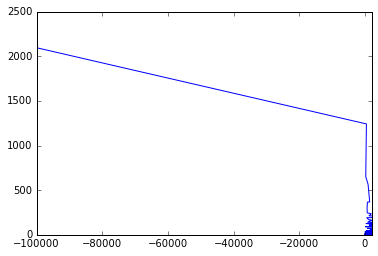

In [76]:
import matplotlib
%matplotlib inline
a['VAR_0899'].value_counts().plot()

In [102]:
a['VAR_0899'].value_counts()

-99999      2095
 500        1242
 300         651
 1000        566
 1500        368
 800         366
 700         303
 750         246
 2000        235
 1300        213
 2500        210
 3000        194
 600         191
 1100        173
 1200        170
 2600        161
 1800        159
 900         142
 5000        139
 400         126
 1250        123
 4000        118
 1700        114
 1750        113
 3500        110
 1400        110
 1600        101
 2300         95
 2200         94
 200          91
            ... 
 162675        1
 9144          1
 17632         1
 44073         1
 140280        1
 50212         1
 64547         1
 58400         1
 72735         1
 68637         1
 80923         1
 338969        1
 135730        1
 115716        1
 136190        1
 144378        1
 160754        1
 105691        1
 183269        1
 191457        1
 189408        1
 211931        1
 209882        1
 85185         1
 244683        1
 246724        1
 1125581       1
 115920       

In [152]:
# [i for i in a.columns if typeof(a)==str]
# [i for i in a.columns if a[i][1]=='01FEB14:00:11:00']


for i in a.columns:
    if(str(a[i][1]).find(':')>-1):
        print (i);


VAR_0073
VAR_0075
VAR_0204
VAR_0217


In [93]:
for s in input_dummies.columns:
    if(len(input_dummies[s].unique())>1000):
        print (s)
        input_dummies = input_dummies.drop([s],axis=1)

VAR_0004
VAR_0541
VAR_0542
VAR_0543
VAR_0544
VAR_0571
VAR_0575
VAR_0576
VAR_0577
VAR_0583
VAR_0584
VAR_0585
VAR_0586
VAR_0598
VAR_0599
VAR_0607
VAR_0608
VAR_0609
VAR_0610
VAR_0628
VAR_0629
VAR_0630
VAR_0631
VAR_0648
VAR_0649
VAR_0650
VAR_0651
VAR_0652
VAR_0653
VAR_0654
VAR_0655
VAR_0659
VAR_0660
VAR_0669
VAR_0670
VAR_0671
VAR_0672
VAR_0673
VAR_0674
VAR_0675
VAR_0676
VAR_0677
VAR_0691
VAR_0698
VAR_0699
VAR_0702
VAR_0704
VAR_0705
VAR_0706
VAR_0887
VAR_0888
VAR_0889
VAR_0890
VAR_0891
VAR_0892
VAR_0893
VAR_0894
VAR_0895
VAR_0896
VAR_0897
VAR_0898
VAR_0899
VAR_0900
VAR_0901
VAR_0902
VAR_0903
VAR_0904
VAR_0905
VAR_0906
VAR_0907
VAR_0908
VAR_0909
VAR_0910
VAR_0912
VAR_0913
VAR_0917
VAR_0918
VAR_0919
VAR_0920
VAR_0921
VAR_0931
VAR_0934
VAR_0937
VAR_0944
VAR_0946
VAR_0950
VAR_0951
VAR_0964
VAR_0968
VAR_0970
VAR_0976
VAR_0977
VAR_0978
VAR_0979
VAR_0980
VAR_1081
VAR_1082
VAR_1083
VAR_1084
VAR_1085
VAR_1086
VAR_1087
VAR_1088
VAR_1089
VAR_1090
VAR_1091
VAR_1092
VAR_1093
VAR_1094
VAR_1095
VAR_1096
V

In [94]:
input_dummies

,VAR_0002,VAR_0003,VAR_0532,VAR_0533,VAR_0534,VAR_0535,VAR_0536,VAR_0537,VAR_0538,VAR_0539,...,VAR_0001_R,VAR_0005_B,VAR_0005_C,VAR_0005_N,VAR_0005_S,VAR_1934_BRANCH,VAR_1934_CSC,VAR_1934_IAPS,VAR_1934_MOBILE,VAR_1934_RCC
0,224,0,5,0,0,5,3,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7,53,0,0,0,3,12,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,116,3,0,0,0,1,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,240,300,0,0,0,1,6,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,72,261,0,0,0,1,8,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,4,4,0,0,0,1,3,1,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,60,132,2,1,0,5,1,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,13,75,0,0,0,0,1,0,0,2,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,17,16,0,0,0,1,5,0,2,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,24,72,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
[len(input_dummies[x].unique()) for x in input_dummies.columns]

[820,
 588,
 13,
 11,
 16,
 32,
 43,
 27,
 12,
 22,
 86,
 8,
 8,
 8,
 8,
 8,
 216,
 114,
 81,
 75,
 349,
 87,
 86,
 85,
 86,
 83,
 83,
 179,
 17,
 2,
 9,
 17,
 2,
 2,
 19,
 14,
 84,
 19,
 171,
 221,
 227,
 364,
 25,
 30,
 30,
 443,
 760,
 104,
 27,
 105,
 105,
 104,
 55,
 55,
 557,
 424,
 932,
 215,
 243,
 9,
 48,
 23,
 9,
 418,
 768,
 568,
 908,
 88,
 36,
 66,
 44,
 14,
 32,
 14,
 15,
 63,
 14,
 31,
 14,
 38,
 87,
 85,
 86,
 86,
 83,
 5,
 7,
 5,
 5,
 767,
 441,
 820,
 183,
 181,
 37,
 10,
 568,
 17,
 17,
 363,
 8,
 9,
 7,
 7,
 9,
 7,
 7,
 10,
 10,
 271,
 331,
 307,
 430,
 96,
 41,
 29,
 973,
 840,
 13,
 18,
 322,
 645,
 105,
 105,
 45,
 44,
 382,
 125,
 8,
 269,
 84,
 35,
 13,
 31,
 103,
 49,
 16,
 41,
 111,
 56,
 16,
 51,
 52,
 69,
 82,
 42,
 24,
 38,
 42,
 24,
 38,
 17,
 23,
 17,
 2,
 2,
 10,
 6,
 2,
 2,
 23,
 2,
 2,
 2,
 22,
 14,
 18,
 5,
 8,
 15,
 22,
 18,
 20,
 33,
 35,
 21,
 11,
 8,
 18,
 261,
 30,
 10,
 14,
 10,
 8,
 6,
 29,
 7,
 19,
 8,
 45,
 13,
 25,
 14,
 10,
 7,
 44,
 8,
 2

In [97]:
# from sklearn import model_selection
from sklearn import cross_validation
clf = RandomForestClassifier(n_estimators=50,verbose=1)
# ~0.726 with n_estimators=25
# ~0.743 with n_estimators=50
cross_validation.cross_val_score(clf, input_dummies, answers, cv=5, scoring='roc_auc')

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jo

array([ 0.74306091,  0.74190454,  0.74440749,  0.74652669,  0.74534079])